#### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the Dataset

In [2]:
file = "iris.data"
# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(file, names=names)
dataset[:5]

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Preprocessing

The next step is to split our dataset into its attributes and labels. To do so, use the following code:

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

#### Train Test Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#### Feature Scaling

##### Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated. Wikipedia explains the reasoning pretty well:

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

The gradient descent algorithm (which is used in neural network training and other machine learning algorithms) also converges faster with normalized features.

##### The following script performs feature scaling:

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Training and Predictions

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

#### Evaluating the Algorithm

For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 7  0  0]
 [ 0 11  1]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



#### Comparing Error Rate with the K Value

In [10]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

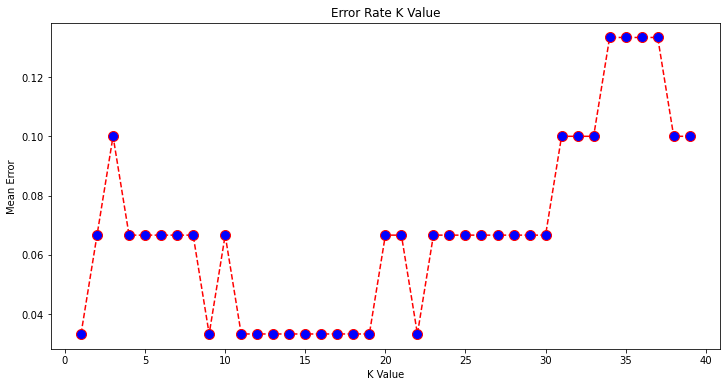

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')